In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


In [26]:
import json 
size = 64
capacity = size * 56 * 128

age = pd.read_csv("age_" + str(size) + ".csv")
age = age.rename(columns={age.columns[-1]:"dic", "N Frames":"frame"})

age.dic = age.dic.map(json.loads)


In [27]:
age["values"] = age.dic.values

mapper = lambda x:[(a, bin) for bin, a in enumerate(x["values"])] if "values" in x.keys() else 0

age["values"] = age.dic.map(mapper)
age[age["values"] != 0]

age = age.loc[:, ["frame", "values"]]
# age1 = age.explode("values")
# age1.to_csv("age_proc.csv")



In [28]:
age_proc = age.explode("values")
age_proc['count'], age_proc['bin'] = age_proc["values"].str
age_proc['count'] = age_proc['count'] / capacity
# age_proc.to_csv("age_proc.csv")

/var/folders/jz/m7wdwkcj4ln9zjyc9v48t67c0000gn/T/ipykernel_93201/3582754663.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  age_proc['count'], age_proc['bin'] = age_proc["values"].str


[Text(0.5, 20.049999999999997, 'Frames Processed'),
 Text(47.25, 0.5, 'Relative Age'),
 Text(0.5, 1.0, 'Replay Buffer Size: 4')]

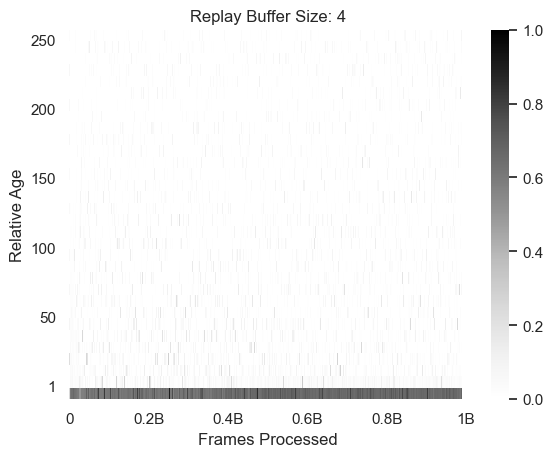

In [34]:
age_pivot = age_proc.pivot("bin", "frame", "count")
from matplotlib.colors import LogNorm
import seaborn
ax = sns.heatmap(age_pivot, vmax=1.0, cmap="Greys")
ax.invert_yaxis()

ax.set_xticks([0, 2500, 5000, 7500, 10000, 12500]) # <--- set the ticks first
ax.set_xticklabels(["0", "0.2B", "0.4B","0.6B", "0.8B", "1B"], rotation=0)

ax.set_yticks(np.linspace(1,31, 6)) # <--- set the ticks first
ax.set_yticklabels([1, 50, 100, 150, 200, 250], rotation=0)

ax.set(xlabel='Frames Processed', ylabel='Relative Age', title="Replay Buffer Size: " + str(size))


In [33]:
age

,frame,values
0,57344,"[(14336, 0), (0, 1), (0, 2), (0, 3), (0, 4), (..."
1,86016,"[(7168, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0..."
2,114688,"[(7168, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0..."
3,143360,"[(7168, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0..."
4,172032,"[(7168, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0..."
...,...,...
12378,1172885504,"[(19009, 0), (1027, 1), (543, 2), (1103, 3), (..."
12379,1172914176,"[(18729, 0), (1317, 1), (517, 2), (459, 3), (1..."
12380,1173114880,"[(19432, 0), (528, 1), (534, 2), (274, 3), (11..."
12381,1173430272,"[(18950, 0), (578, 1), (723, 2), (27, 3), (489..."
